# Soal 1

Rancang FIR dengan metode windowing dengan spesifikasi filter,
- Tipe: LPF
- $f_s$: 10 kHz
- $f_c$: 2 kHz
- Transtion band: 1 kHz
- Stopband attenuation: 25 db
- Passband ripple: < 0.1 db

Tentukan window yang cocok, kemudian hitung secara manual nilai $h(0)$, $h(\frac{N}{2})$, $h(N)$

## Jawab Soal 1

### Jenis Window + Perhitungan
Berdasarkan spek filter, window yang paling mendekati adalah 'Hanning'

$f_c$ dengan transition -> $f_{c'} = 2kHz - 0.5(1kHz) = 1.5kHz$

Orde -> 

$\left( \frac{transition \; band}{f_s} \right) = \frac{1}{10} = 0.1$

$ 0.1 = \frac{3.1}{N+1} $

$ N + 1 = \frac{3.1}{0.1} $

$ N = 31 - 1 = 30 $

Sehingga, panjang window adalah $N+1 = 31$

Hitung nilai $h(0)$, $h(\frac{N}{2})$, $h(N)$ --> dengan matlab (mahasiswa manual)

$ h(0) = -0.0002 $

$h(\frac{N}{2}) = h(15) = -0.2551$

$ h(N) = h(30) = -0.0005 $

## Soal 2

Implementasikan soal 1 dengan matlab 'fir1' lengkap dengan impulse response dan freq response

## Jawab Soal 2

```matlab
% Untuk FIR Window kika akan menggunakan fungsi 'fir1'
format short
b = fir1(30,1500/5000,'low',hanning(31));

figure(1)
plot(b)

% Cek respon frekuensi
[h, w] = freqz(b, 1, 'whole');
% 'whole' digunakan untuk melakukan pencerminan

% plot frekuensi response
figure(2)
plot(w/pi, abs(h))
```

## Soal 3

Implementasi soal 1 dengan python

### Jawab Soal 3

[ 0.      0.0001 -0.0003 -0.0024 -0.0039  0.      0.0099  0.0169  0.0078
 -0.0204 -0.0477 -0.039   0.0296  0.1448  0.2546  0.2999  0.2546  0.1448
  0.0296 -0.039  -0.0477 -0.0204  0.0078  0.0169  0.0099  0.     -0.0039
 -0.0024 -0.0003  0.0001  0.    ]


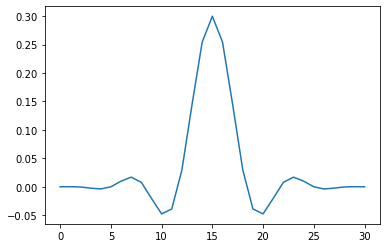

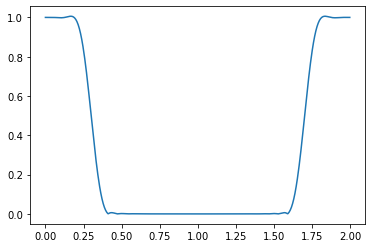

In [1]:
# fir1 pada Matlab ekivalen dengan firwin di scipy
# import library
from scipy import signal, pi
import numpy as np
import matplotlib.pyplot as plt

# Definisikan spek filter
n = 31 # panjang filter -> orde + 1
fc_ = 1500 # freq cut-off terkoreksi
hfs = 5000 # setengah fs

# Kalkulasi h(n)
b = signal.firwin(n, fc_/hfs, window='hanning', pass_zero='lowpass')
np.set_printoptions(precision=4) # bulatkan 4 angkat koma
np.set_printoptions(suppress=True) # hilangkan nilai e
print(b)

# Plot h(n)
plt.figure(1)
plt.plot(b)

# Kalkulasi FFT dari h(n)
w, h = signal.freqz(b, 1, whole=True)
plt.figure(2)
plt.plot(w/pi, abs(h))